# PI7 Deel 3 - Niema Mahmoudi & Silas Dannullis

## Neuraal netwerk 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, precision_recall_curve, auc
import seaborn as sns

df = pd.read_csv('preprocessed_boston_housing.csv')

# Scheid features en target
X = df.drop(columns=['medv'])
y = df['medv']

# Splits de data in training- en testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Definieer de parameter grid voor Grid Search
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive'],
}

# Maak een GridSearchCV object
grid_search = GridSearchCV(MLPRegressor(max_iter=1000, random_state=42), param_grid, cv=5, verbose=True, n_jobs=-1)

# Train Grid Search
grid_search.fit(X_train, y_train)

# Print de beste parameters
print("Beste parameters gevonden door Grid Search:", grid_search.best_params_)

# Gebruik het beste model gevonden door Grid Search
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Beste parameters gevonden door Grid Search: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [4]:
# Voorspel op de testset
y_pred = best_model.predict(X_test)

# Bereken de Mean Squared Error en R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Toon enkele voorspellingen naast de werkelijke waarden
for i in range(10):
    print(f'Werkelijke waarde: {y_test.iloc[i]}, Voorspelde waarde: {y_pred[i]}')

Mean Squared Error: 0.07463397919056815
R^2 Score: 0.8900473552689673
Werkelijke waarde: 0.4208956047597377, Voorspelde waarde: 0.4165979593656478
Werkelijke waarde: -0.1015242873296184, Voorspelde waarde: -0.32005218384896866
Werkelijke waarde: -0.2430130081038192, Voorspelde waarde: -0.11296174918755034
Werkelijke waarde: 2.989460074199074, Voorspelde waarde: 1.6791953034179945
Werkelijke waarde: 0.0943831722038899, Voorspelde waarde: 0.10356500591652036
Werkelijke waarde: -1.0701778372453004, Voorspelde waarde: -1.0424961871522458
Werkelijke waarde: 0.8453617670823401, Voorspelde waarde: 0.8835701924198285
Werkelijke waarde: 0.2467556407299525, Voorspelde waarde: 0.19990725805141396
Werkelijke waarde: -0.2538967558556809, Voorspelde waarde: 0.2770271950128969
Werkelijke waarde: -1.668783963597688, Voorspelde waarde: -1.5918871442595321


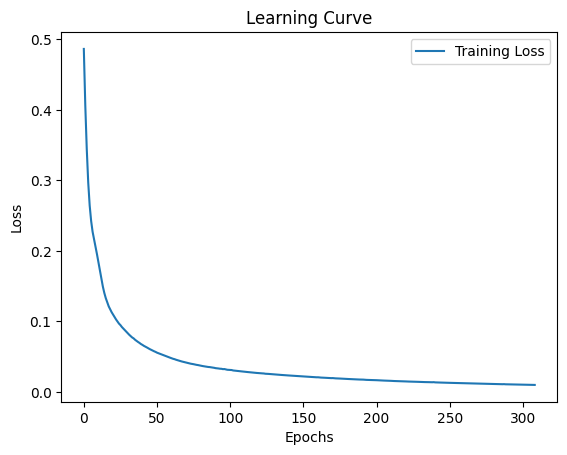

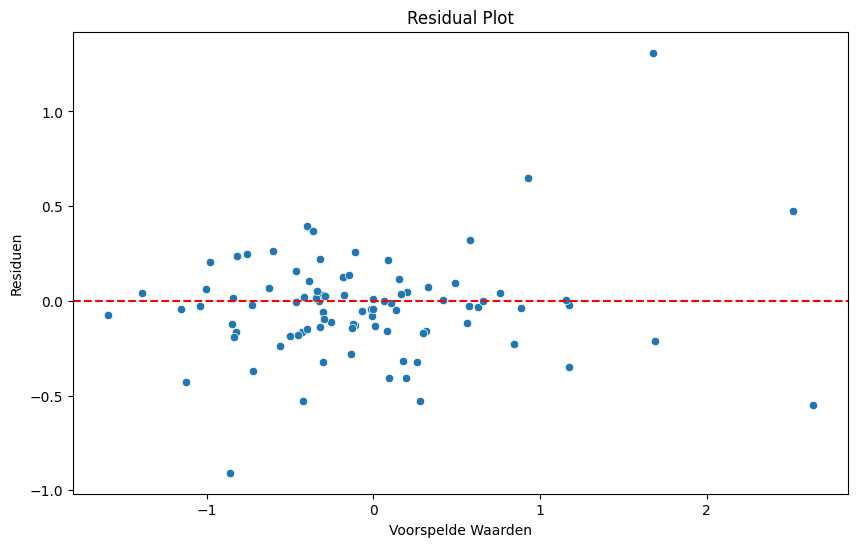

In [5]:
history = best_model.loss_curve_
plt.plot(history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Bereken de residuen
residuals = y_test - y_pred

# Plot Residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Voorspelde Waarden')
plt.ylabel('Residuen')
plt.title('Residual Plot')
plt.show()

## Support Vector Machine   

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns=['chas'])
y = df['chas'] # chas is de target variabele 

# Splits de data in training- en testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


In [12]:
# Definieer de parameter grid voor Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Maak een GridSearchCV object
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=3, verbose=True, n_jobs=-1)

# Train Grid Search
grid_search.fit(X_train, y_train)

# Print de beste parameters
print("Beste parameters gevonden door Grid Search:", grid_search.best_params_)

# Gebruik het beste model gevonden door Grid Search
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Beste parameters gevonden door Grid Search: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        84
           1       0.00      0.00      0.00         6

    accuracy                           0.93        90
   macro avg       0.47      0.50      0.48        90
weighted avg       0.87      0.93      0.90        90


Werkelijke waarden vs. Voorspelde waarden:
Werkelijke waarde: 0, Voorspelde waarde: 0
Werkelijke waarde: 0, Voorspelde waarde: 0
Werkelijke waarde: 0, Voorspelde waarde: 0
Werkelijke waarde: 1, Voorspelde waarde: 0
Werkelijke waarde: 0, Voorspelde waarde: 0
Werkelijke waarde: 0, Voorspelde waarde: 0
Werkelijke waarde: 0, Voorspelde waarde: 0
Werkelijke waarde: 0, Voorspelde waarde: 0
Werkelijke waarde: 0, Voorspelde waarde: 0
Werkelijke waarde: 0, Voorspelde waarde: 0


C:\Users\sdann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sdann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sdann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

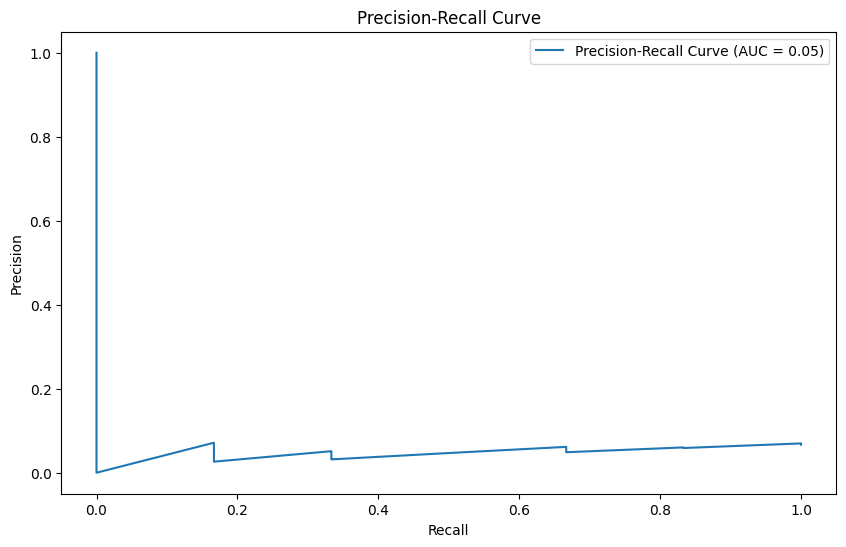

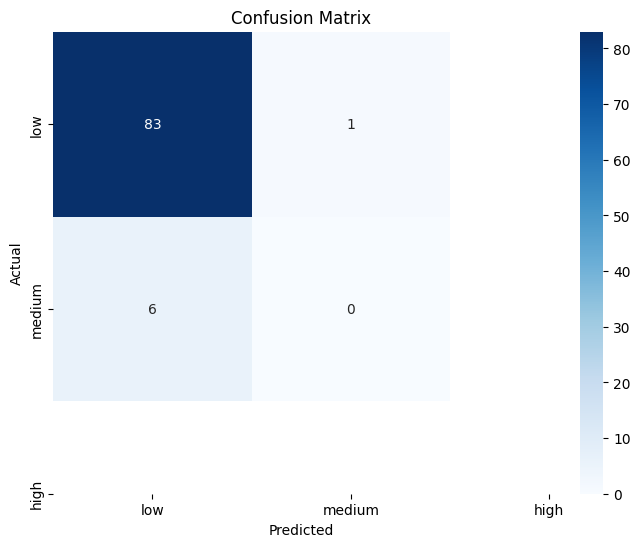

In [15]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Bereken de nauwkeurigheid en genereer een classificatierapport
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

# Toon enkele voorspellingen naast de werkelijke waarden
print("\nWerkelijke waarden vs. Voorspelde waarden:")
for i in range(10):
    print(f'Werkelijke waarde: {y_test.iloc[i]}, Voorspelde waarde: {y_pred[i]}')

# Bereken Precision-Recall waarden
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Plot de Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


